D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

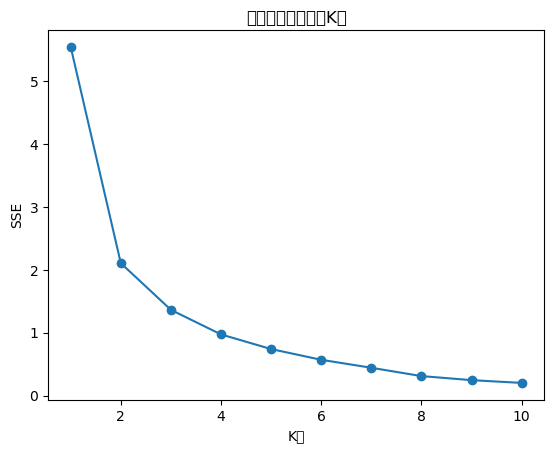

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 加载数据
data = pd.read_csv('data.csv', encoding='gbk')
train_x = data[["2019年国际排名", "2018世界杯", "2015亚洲杯"]]

# 数据规范化到 [0,1] 范围
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

# 肘部法则
sse = []  # 用于存放每个K值的SSE
k_range = range(1, 11)  # K值的范围

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    sse.append(kmeans.inertia_)  # inertia_ 是SSE

# 绘制肘部法则图
plt.plot(k_range, sse, marker='o')
plt.xlabel('K值')
plt.ylabel('SSE')
plt.title('肘部法则确定最佳K值')
plt.show()


D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

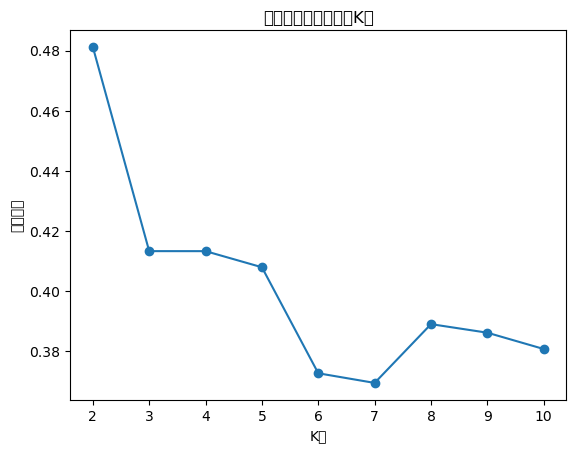

In [2]:
from sklearn.metrics import silhouette_score

# 轮廓系数法确定最佳K值
silhouette_scores = []  # 用于存放每个K值的轮廓系数

for k in range(2, 11):  # K值从2开始
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    score = silhouette_score(train_x, kmeans.labels_)  # 计算轮廓系数
    silhouette_scores.append(score)

# 绘制轮廓系数随K值的变化曲线
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('K值')
plt.ylabel('轮廓系数')
plt.title('轮廓系数法确定最佳K值')
plt.show()
